In [26]:
import pandas as pd
import numpy as np
import streamlit as st
from matplotlib import pyplot as plt
import altair as alt

In [27]:
aqi = pd.read_csv("mlm_aqi_data.csv")
aqi.head()

State  urban_perc_state   County  percentage20_Donald_Trump  \
0  Alabama             0.577  Baldwin                      0.762   
1  Alabama             0.577     Clay                      0.808   
2  Alabama             0.577   DeKalb                      0.844   
3  Alabama             0.577   Elmore                      0.736   
4  Alabama             0.577   Etowah                      0.745   

   percentage20_Joe_Biden  avg_sal_2022  white_perc  baa_perc  asian_perc  \
0                   0.223       56747.0    0.893656  0.094556    0.017246   
1                   0.183       39876.0    0.851035  0.153050    0.004719   
2                   0.146       40558.0    0.946637  0.026404    0.007236   
3                   0.252       49071.0    0.764367  0.230173    0.011433   
4                   0.242       42951.0    0.825877  0.163812    0.011262   

   native_perc   pi_perc  his_perc  AQI  CO_perc  NO2_perc   O3_perc  \
0     0.017071  0.002414  0.050362   40      0.0       0.0  0.808511   
1     0.012326  0.001056  0.031835   27      0.0       0.0  0.000000   
2     0.037126  0.006820  0.159921   37      0.0       0.0  0.925620   
3     0.011121  0.001999  0.031799   37      0.0       0.0  1.000000   
4     0.015201  0.004152  0.047736   42      0.0       0.0  0.424581   

   PM2.5_perc  PM10_perc  
0    0.191489        0.0  
1    1.000000        0.0  
2    0.074380        0.0  
3    0.000000        0.0  
4    0.575419        0.0

In [28]:
aqi.columns

Index(['State', 'urban_perc_state', 'County', 'percentage20_Donald_Trump',
       'percentage20_Joe_Biden', 'avg_sal_2022', 'white_perc', 'baa_perc',
       'asian_perc', 'native_perc', 'pi_perc', 'his_perc', 'AQI', 'CO_perc',
       'NO2_perc', 'O3_perc', 'PM2.5_perc', 'PM10_perc'],
      dtype='object')

In [29]:
alt.Chart(aqi).mark_bar().encode(
    alt.X("AQI", bin=True),
    y='count()',
)

alt.Chart(...)

### Popular voter turnout vs. AQI

In [30]:
trump = alt.Chart(aqi).mark_circle(size=60, color='red').encode(
    x='percentage20_Donald_Trump',
    y='AQI')
biden = alt.Chart(aqi).mark_circle(size=60).encode(
    x='percentage20_Joe_Biden',
    y='AQI')

In [31]:
trump + biden

alt.LayerChart(...)

### Racial demographics vs. AQI

In [32]:
white = alt.Chart(aqi).mark_circle(size=60, color='red').encode(
    x='white_perc',
    y='AQI')
black = alt.Chart(aqi).mark_circle(size=60, color='black').encode(
    x='baa_perc',
    y='AQI')
asian = alt.Chart(aqi).mark_circle(size=60, color='green').encode(
    x='asian_perc',
    y='AQI')
native = alt.Chart(aqi).mark_circle(size=60, color='pink').encode(
    x= 'native_perc',
    y='AQI')
pac_island = alt.Chart(aqi).mark_circle(size=60, color='orange').encode(
    x= 'pi_perc',
    y='AQI')
hispanic = alt.Chart(aqi).mark_circle(size=60, color='purple').encode(
    x= 'his_perc',
    y='AQI')

In [33]:
white

alt.Chart(...)

In [34]:
black

alt.Chart(...)

In [35]:
asian

alt.Chart(...)

In [36]:
hispanic

alt.Chart(...)

In [37]:
native

alt.Chart(...)

### Salaries vs. AQI

In [38]:
alt.Chart(aqi).mark_circle(size=60, color='orange').encode(
    x= 'avg_sal_2022',
    y='AQI')

alt.Chart(...)

### Checking for model assumptions

In [39]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [40]:
aqi.rename(columns={'PM2.5_perc': 'PM25_perc'}, inplace=True)

In [41]:
#find design matrix for regression model using 'rating' as response variable 
y, X = dmatrices('AQI ~ urban_perc_state + percentage20_Donald_Trump + percentage20_Joe_Biden+avg_sal_2022+white_perc+baa_perc+asian_perc+native_perc+pi_perc+his_perc+CO_perc+NO2_perc+O3_perc+PM25_perc+PM10_perc', 
                 data=aqi, return_type='dataframe')

#create DataFrame to hold VIF values
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 

#calculate VIF for each predictor variable 
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#view VIF for each predictor variable 

/Users/izzyestrada/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/izzyestrada/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [42]:
vif_df

variable         VIF
0                   Intercept    0.000000
1            urban_perc_state    1.377954
2   percentage20_Donald_Trump  609.563075
3      percentage20_Joe_Biden  621.740465
4                avg_sal_2022    1.410127
5                  white_perc  205.912211
6                    baa_perc  166.823902
7                  asian_perc   30.899613
8                 native_perc   30.164326
9                     pi_perc    1.798432
10                   his_perc    1.378208
11                    CO_perc         inf
12                   NO2_perc         inf
13                    O3_perc         inf
14                  PM25_perc         inf
15                  PM10_perc         inf

In [43]:
alt.Chart(aqi).mark_circle(size=60, color='orange').encode(
    x= 'asian_perc',
    y='native_perc')

alt.Chart(...)

In [44]:
alt.Chart(aqi).mark_circle(size=60, color='red').encode(
    x= 'baa_perc',
    y='white_perc')

alt.Chart(...)

In [45]:
alt.Chart(aqi).mark_circle(size=60, color='orange').encode(
    x= 'percentage20_Donald_Trump',
    y='percentage20_Joe_Biden')

alt.Chart(...)

In [46]:
#fit multiple linear regression model
model1 = ols('AQI ~ County + State + urban_perc_state + percentage20_Donald_Trump + percentage20_Joe_Biden+avg_sal_2022+white_perc+baa_perc+asian_perc+native_perc+pi_perc+his_perc+CO_perc+NO2_perc+O3_perc+PM25_perc+PM10_perc',
             data=aqi).fit()

#model1.summary()

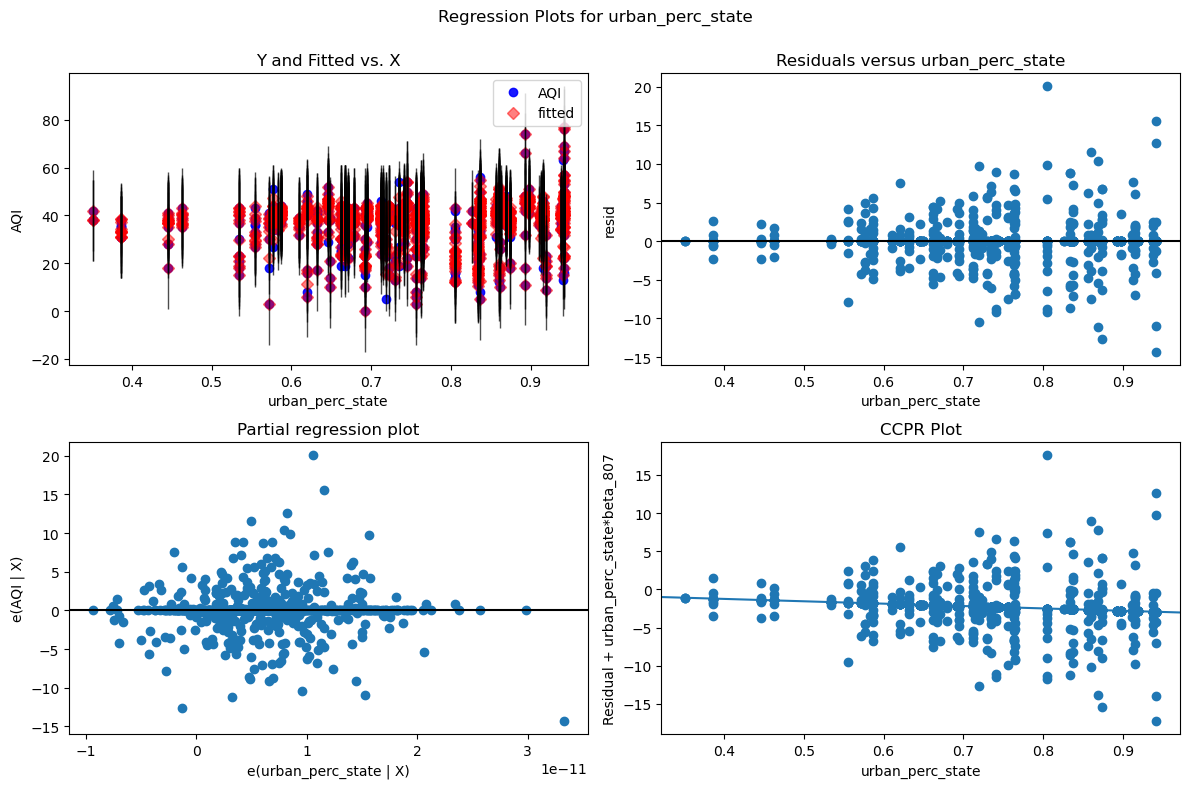

In [47]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model1, 'urban_perc_state', fig=fig)


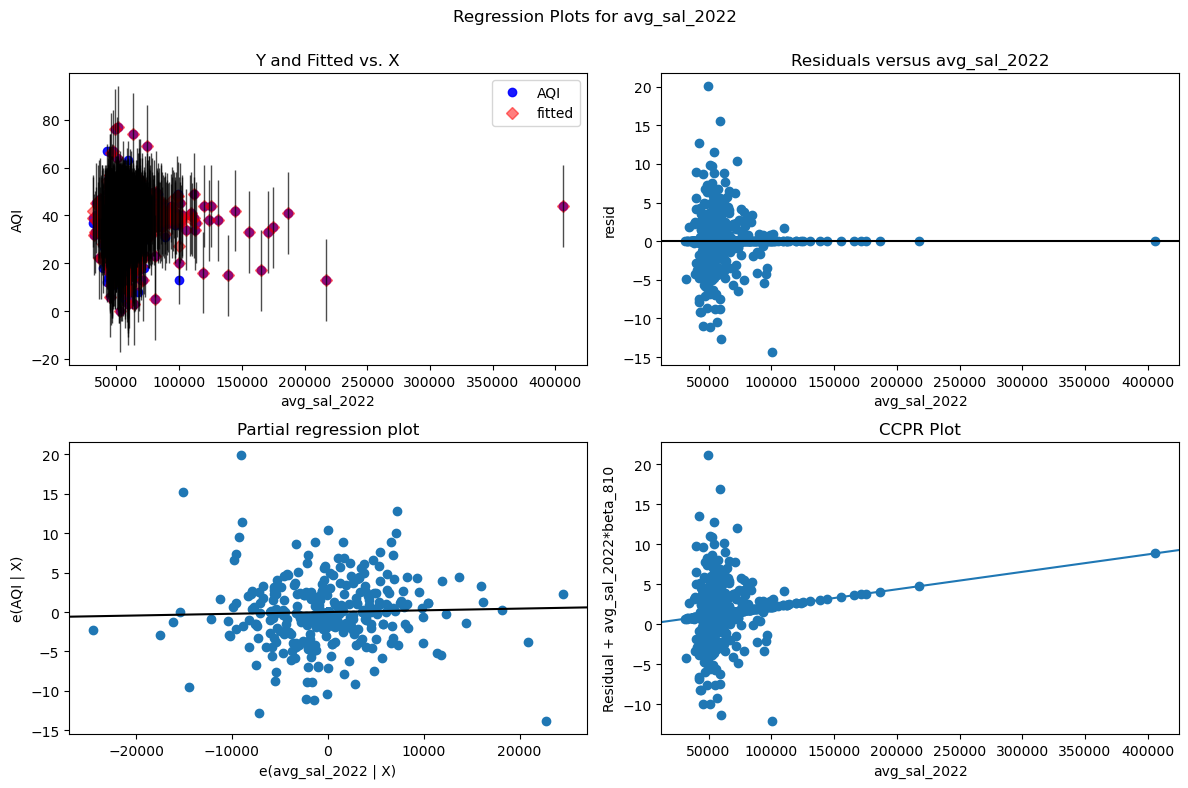

In [48]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model1, 'avg_sal_2022', fig=fig)


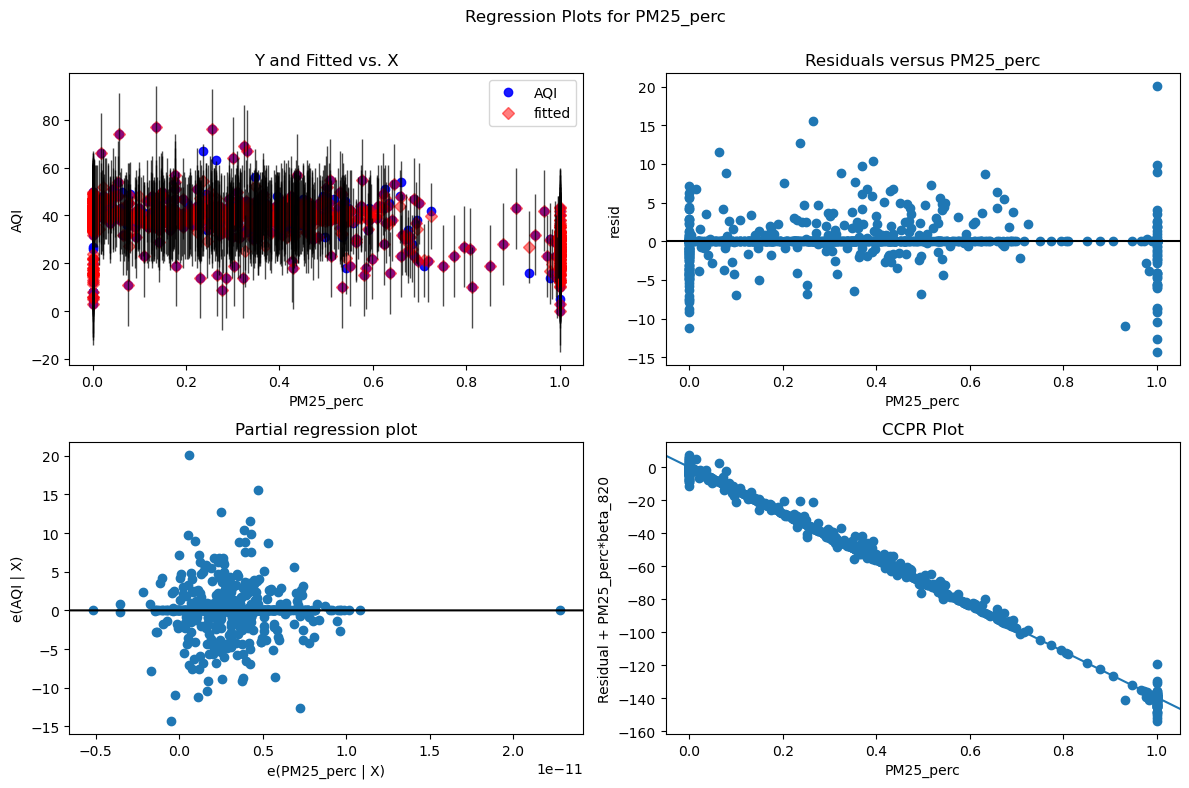

In [49]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model1, 'PM25_perc', fig=fig)


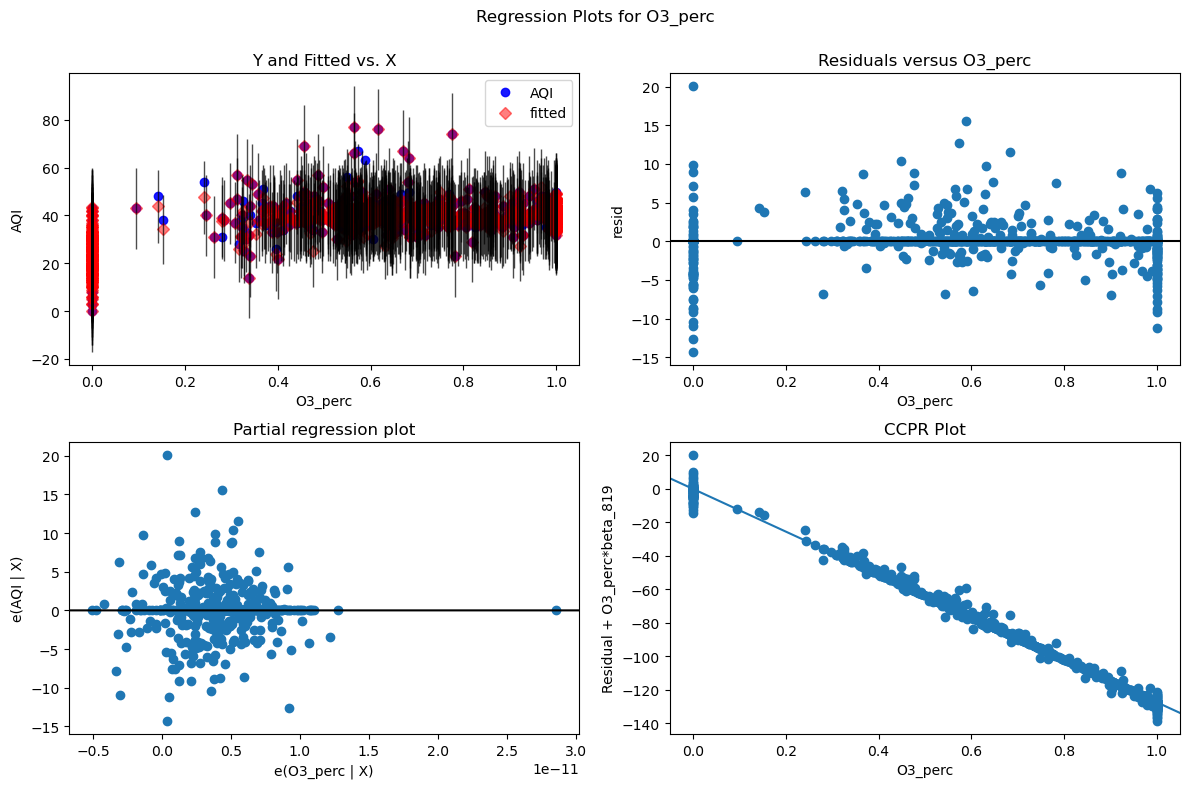

In [50]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model1, 'O3_perc', fig=fig)


In [55]:
alt.Chart(aqi).mark_point().encode(
    x='urban_perc_state',
    y='O3_perc',
    color='State'
)

alt.Chart(...)